In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [3]:
# read X and y data
df = pd.read_csv('temp2d.csv', header = None) # put the full path
X = df.iloc[:, 0:2].to_numpy()
y = df.iloc[:, 2].to_numpy()
# fit with linear features
N = X.shape[0]
A = np.column_stack((np.ones(N), X))
theta = la.solve(A.T @ A, A.T @ y)
y_hat = A @ theta
# fit with quadratic features
A = np.column_stack((np.ones(N), X, X**2, X[:,0]*X[:,1]))

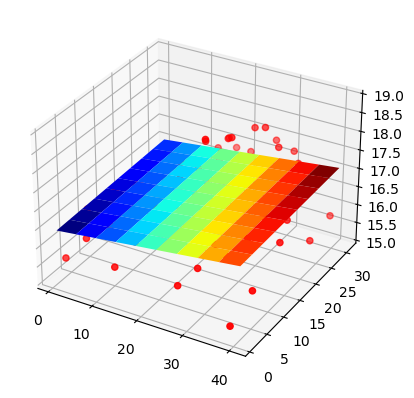

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim(15, 19)
ax.scatter(X[:, 0], X[:, 1], y, color="r")
n = 10
xrange = np.linspace(min(X[:, 0]), max(X[:, 0]), n)
yrange = np.linspace(min(X[:, 1]), max(X[:, 1]), n)
xx, yy = np.meshgrid(xrange, yrange)
flatxx = xx.reshape((n**2, 1))
flatyy = yy.reshape((n**2, 1))
z = np.column_stack((flatxx, flatyy))
z = np.column_stack((np.ones(n**2), z))
f = z @ theta
ax.plot_surface(xx, yy, f.reshape(n, n), cmap="jet")

[ 1.          4.94444444  1.         24.44753086  1.          4.94444444]
[  1.    24.5   20.   600.25 400.   490.  ]


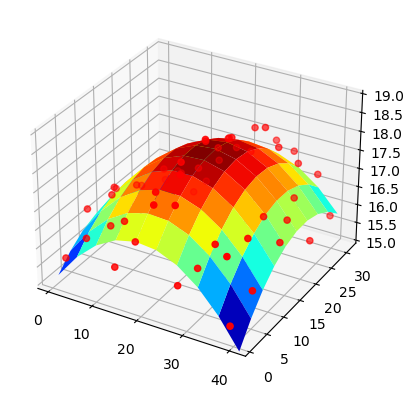

In [9]:
# fit with quadratic features
A = np.column_stack((np.ones(N), X, X**2, X[:, 0] * X[:, 1]))
theta = la.solve(A.T @ A, A.T @ y)
y_hat = A @ theta

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim(15, 19)
ax.scatter(X[:, 0], X[:, 1], y, color="r")
n = 10
xrange = np.linspace(min(X[:, 0]), max(X[:, 0]), n)
yrange = np.linspace(min(X[:, 1]), max(X[:, 1]), n)
xx, yy = np.meshgrid(xrange, yrange)
flatxx = xx.reshape((n**2, 1))
flatyy = yy.reshape((n**2, 1))
z = np.column_stack((flatxx, flatyy))
z = np.column_stack((np.ones(n**2), z, z**2, z[:, 0] * z[:, 1]))
print(z[:10][1])
print(A[:10][1])
f = z @ theta

ax.plot_surface(xx, yy, f.reshape(n, n), cmap="jet")
plt.show()